In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('classic')

In [2]:
df_iv = pd.read_csv("./outs/deribit_daily_avg_iv.csv")
df_iv.head()

,datetime,symbol,total_quote_amount,avg_iv,time_to_expiry
0,2019-09-08,BTC-27DEC19-10000-C,14786.1,0.813613,0.298630
1,2019-09-08,BTC-27DEC19-10000-P,18538.2,0.675237,0.298630
2,2019-09-09,BTC-27DEC19-10000-C,173622.4,0.794151,0.295890
3,2019-09-09,BTC-27DEC19-10000-P,176471.7,0.711817,0.295890
4,2019-09-10,BTC-27DEC19-10000-C,204885.9,0.787959,0.293151


In [3]:
df_iv['datetime'] = pd.to_datetime(df_iv['datetime'])
df_iv.head()

,datetime,symbol,total_quote_amount,avg_iv,time_to_expiry
0,2019-09-08,BTC-27DEC19-10000-C,14786.1,0.813613,0.298630
1,2019-09-08,BTC-27DEC19-10000-P,18538.2,0.675237,0.298630
2,2019-09-09,BTC-27DEC19-10000-C,173622.4,0.794151,0.295890
3,2019-09-09,BTC-27DEC19-10000-P,176471.7,0.711817,0.295890
4,2019-09-10,BTC-27DEC19-10000-C,204885.9,0.787959,0.293151


In [4]:
df_iv['weighted_iv'] = df_iv['total_quote_amount'] * df_iv['avg_iv']
df_iv.head()

,datetime,symbol,total_quote_amount,avg_iv,time_to_expiry,weighted_iv
0,2019-09-08,BTC-27DEC19-10000-C,14786.1,0.813613,0.298630,12030.160567
1,2019-09-08,BTC-27DEC19-10000-P,18538.2,0.675237,0.298630,12517.686297
2,2019-09-09,BTC-27DEC19-10000-C,173622.4,0.794151,0.295890,137882.430889
3,2019-09-09,BTC-27DEC19-10000-P,176471.7,0.711817,0.295890,125615.469681
4,2019-09-10,BTC-27DEC19-10000-C,204885.9,0.787959,0.293151,161441.692934


In [5]:
df_iv_sum = df_iv.set_index('datetime').groupby([pd.Grouper(freq='D')]).sum()
df_iv_sum.head()

,total_quote_amount,avg_iv,time_to_expiry,weighted_iv
datetime,,,,
2019-09-08,33324.3,1.488850,0.597260,24547.846865
2019-09-09,350094.1,1.505968,0.591781,263497.900571
2019-09-10,430070.9,1.487253,0.586301,318912.151653
2019-09-11,531172.7,1.492516,0.580822,394092.032224
2019-09-12,416257.8,1.498269,0.575342,303856.006809


In [6]:
df_iv_sum['iv'] = df_iv_sum['weighted_iv'] / df_iv_sum['total_quote_amount']
df_iv_sum.head()

,total_quote_amount,avg_iv,time_to_expiry,weighted_iv,iv
datetime,,,,,
2019-09-08,33324.3,1.488850,0.597260,24547.846865,0.736635
2019-09-09,350094.1,1.505968,0.591781,263497.900571,0.752649
2019-09-10,430070.9,1.487253,0.586301,318912.151653,0.741534
2019-09-11,531172.7,1.492516,0.580822,394092.032224,0.741928
2019-09-12,416257.8,1.498269,0.575342,303856.006809,0.729971


In [7]:
df_iv = df_iv.set_index('datetime').groupby([pd.Grouper(freq='D')]).last()
df_iv.head()

,symbol,total_quote_amount,avg_iv,time_to_expiry,weighted_iv
datetime,,,,,
2019-09-08,BTC-27DEC19-10000-P,18538.2,0.675237,0.298630,12517.686297
2019-09-09,BTC-27DEC19-10000-P,176471.7,0.711817,0.295890,125615.469681
2019-09-10,BTC-27DEC19-10000-P,225185.0,0.699294,0.293151,157470.458720
2019-09-11,BTC-27DEC19-10000-P,293899.1,0.705644,0.290411,207388.081382
2019-09-12,BTC-27DEC19-10000-P,288307.5,0.699389,0.287671,201638.956428


In [8]:
df_iv = df_iv.join(df_iv_sum['iv'], on='datetime', how='left')
df_iv.head()

,symbol,total_quote_amount,avg_iv,time_to_expiry,weighted_iv,iv
datetime,,,,,,
2019-09-08,BTC-27DEC19-10000-P,18538.2,0.675237,0.298630,12517.686297,0.736635
2019-09-09,BTC-27DEC19-10000-P,176471.7,0.711817,0.295890,125615.469681,0.752649
2019-09-10,BTC-27DEC19-10000-P,225185.0,0.699294,0.293151,157470.458720,0.741534
2019-09-11,BTC-27DEC19-10000-P,293899.1,0.705644,0.290411,207388.081382,0.741928
2019-09-12,BTC-27DEC19-10000-P,288307.5,0.699389,0.287671,201638.956428,0.729971


In [9]:
df_iv = df_iv[['iv', 'time_to_expiry']]
df_iv.head()

,iv,time_to_expiry
datetime,,
2019-09-08,0.736635,0.298630
2019-09-09,0.752649,0.295890
2019-09-10,0.741534,0.293151
2019-09-11,0.741928,0.290411
2019-09-12,0.729971,0.287671


In [10]:
df_rv = pd.read_csv('./outs/bitcoin_historical_vol.csv')
df_rv['datetime'] = pd.to_datetime(df_rv['datetime'])
df_rv.set_index('datetime', inplace=True)
df_rv.head()

,rv,close,log_return
datetime,,,
2019-09-08,0.802524,10290.310194,NaN
2019-09-09,0.503743,10299.879771,0.000930
2019-09-10,0.477289,10224.414965,-0.007354
2019-09-11,0.470619,10071.423250,-0.015076
2019-09-12,0.357450,10216.206507,0.014273


In [11]:
df_iv_rv = df_iv.join(df_rv, on='datetime', how='inner')
df_iv_rv.head()

,iv,time_to_expiry,rv,close,log_return
datetime,,,,,
2019-09-08,0.736635,0.298630,0.802524,10290.310194,NaN
2019-09-09,0.752649,0.295890,0.503743,10299.879771,0.000930
2019-09-10,0.741534,0.293151,0.477289,10224.414965,-0.007354
2019-09-11,0.741928,0.290411,0.470619,10071.423250,-0.015076
2019-09-12,0.729971,0.287671,0.357450,10216.206507,0.014273


In [12]:
df_iv_rv[df_iv_rv['iv'] == 0].count()

iv                3
time_to_expiry    3
rv                3
close             3
log_return        3
dtype: int64

In [13]:
df_iv_rv['iv'] = df_iv_rv['iv'].replace(to_replace=0, method='ffill')

In [14]:
df_iv_rv[df_iv_rv['rv'] >= 2] = 2

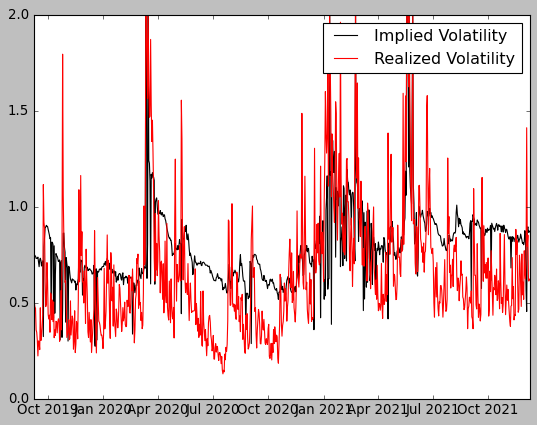

In [15]:
plt.plot(df_iv_rv['iv'], label='Implied Volatility', color='black')
plt.plot(df_iv_rv['rv'], label='Realized Volatility', color='red')
plt.legend()
plt.show()

In [16]:
df_iv_rv.to_csv('./outs/bitcoin_iv_rv.csv')

In [17]:
df_iv_rv['iv'].corr(df_iv_rv['rv'])

0.598963690714017